In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models

train_df = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv', header=None)
test_df = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv', header=None)

data = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Разделим признаки и целевую переменную
X = data.iloc[:, :-1].values  # Все столбцы, кроме последнего
y = data.iloc[:, -1].values   # Последний столбец - метка класса

# Проверим распределение классов (опционально)
unique, counts = np.unique(y, return_counts=True)
print("Распределение по классам:", dict(zip(unique, counts)))


Распределение по классам: {0.0: 90589, 1.0: 2779, 2.0: 7236, 3.0: 803, 4.0: 8039}


In [4]:
from sklearn.preprocessing import StandardScaler

# Нормализация каждого сигнала отдельно
X_normalized = np.zeros_like(X)
for i in range(X.shape[0]):
    X_normalized[i] = (X[i] - X[i].mean()) / X[i].std()

X_normalized

array([[ 4.99521722,  4.70289165,  3.3108648 , ..., -0.55896947,
        -0.55896947, -0.55896947],
       [ 5.44760886,  4.8411427 ,  2.32609117, ..., -0.56354247,
        -0.56354247, -0.56354247],
       [ 6.75867489,  4.30466765,  0.89632402, ..., -0.44753711,
        -0.44753711, -0.44753711],
       ...,
       [ 6.01087116,  5.7913063 ,  3.45593338, ..., -0.71580101,
        -0.71580101, -0.71580101],
       [ 4.15543144,  1.97546189,  2.18307817, ..., -0.99344878,
        -0.99344878, -0.99344878],
       [ 2.60683919,  2.37598228,  2.19459478, ..., -1.09511495,
        -1.09511495, -1.09511495]])

In [5]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([0, 0, 0, ..., 4, 4, 4])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y_encoded, 
    test_size=0.2, 
    random_state=45642, 
    stratify=y_encoded
)
X_train

array([[ 4.8672487 ,  3.43213984,  0.28756345, ..., -0.80987263,
        -0.80987263, -0.80987263],
       [ 0.12042436,  1.8910995 ,  1.68679081, ..., -1.37783925,
        -1.37783925, -1.37783925],
       [ 5.34714912,  4.69024004,  2.21419745, ..., -0.61556528,
        -0.61556528, -0.61556528],
       ...,
       [ 6.91814456,  4.23901214, -2.32212947, ..., -0.3537869 ,
        -0.6271679 , -0.57249177],
       [ 6.62240323,  4.2131812 ,  0.00933401, ..., -0.70359912,
        -0.70359912, -0.70359912],
       [ 4.92241111,  1.93973045,  2.1400597 , ..., -0.77584454,
        -0.77584454, -0.77584454]])

In [8]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train

array([[[ 4.8672487 ],
        [ 3.43213984],
        [ 0.28756345],
        ...,
        [-0.80987263],
        [-0.80987263],
        [-0.80987263]],

       [[ 0.12042436],
        [ 1.8910995 ],
        [ 1.68679081],
        ...,
        [-1.37783925],
        [-1.37783925],
        [-1.37783925]],

       [[ 5.34714912],
        [ 4.69024004],
        [ 2.21419745],
        ...,
        [-0.61556528],
        [-0.61556528],
        [-0.61556528]],

       ...,

       [[ 6.91814456],
        [ 4.23901214],
        [-2.32212947],
        ...,
        [-0.3537869 ],
        [-0.6271679 ],
        [-0.57249177]],

       [[ 6.62240323],
        [ 4.2131812 ],
        [ 0.00933401],
        ...,
        [-0.70359912],
        [-0.70359912],
        [-0.70359912]],

       [[ 4.92241111],
        [ 1.93973045],
        [ 2.1400597 ],
        ...,
        [-0.77584454],
        [-0.77584454],
        [-0.77584454]]])

In [10]:
model = tf.keras.Sequential([
    # Блок 1D-CNN
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    
    # Для сохранения размерности временного ряда перед LSTM
    # не используем Flatten, а работаем напрямую с выходом CNN
    
    # Блок LSTM
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(64),
    
    # Полносвязные слои
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')  # Пять классов (0..4)
])

model.compile(
    loss='sparse_categorical_crossentropy',  # т.к. y в виде целых меток
    optimizer='adam', 
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 185, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 183, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 91, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 91, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,869 (300.27 KB)

 Trainable params: 76,869 (300.27 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    X_train, 
    y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)
history

Epoch 1/15
548/548 ━━━━━━━━━━━━━━━━━━━━ 118s 208ms/step - accuracy: 0.8300 - loss: 0.6869 - val_accuracy: 0.8860 - val_loss: 0.3948
Epoch 2/15
548/548 ━━━━━━━━━━━━━━━━━━━━ 114s 208ms/step - accuracy: 0.8977 - loss: 0.3732 - val_accuracy: 0.8920 - val_loss: 0.3453
Epoch 3/15
548/548 ━━━━━━━━━━━━━━━━━━━━ 114s 208ms/step - accuracy: 0.9210 - loss: 0.2926 - val_accuracy: 0.9328 - val_loss: 0.2404
Epoch 4/15
548/548 ━━━━━━━━━━━━━━━━━━━━ 115s 209ms/step - accuracy: 0.9437 - loss: 0.2058 - val_accuracy: 0.9485 - val_loss: 0.1840
Epoch 5/15
548/548 ━━━━━━━━━━━━━━━━━━━━ 114s 209ms/step - accuracy: 0.9553 - loss: 0.1670 - val_accuracy: 0.9592 - val_loss: 0.1533
Epoch 6/15
548/548 ━━━━━━━━━━━━━━━━━━━━ 141s 207ms/step - accuracy: 0.9593 - loss: 0.1492 - val_accuracy: 0.9579 - val_loss: 0.1484
Epoch 7/15
548/548 ━━━━━━━━━━━━━━━━━━━━ 113s 206ms/step - accuracy: 0.9619 - loss: 0.1399 - val_accuracy: 0.9648 - val_loss: 0.1335
Epoch 8/15
548/548 ━━━━━━━━━━━━━━━━━━━━ 113s 207ms/step - accuracy: 0.9655 -

In [12]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nТочность на тестовой выборке: {acc:.4f}")


Точность на тестовой выборке: 0.9720


In [13]:
y_pred = model.predict(X_test).argmax(axis=1)

685/685 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step


In [18]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_axis2 = model.predict(X_test)
print(classification_report(y_test, y_pred))

# ROC-AUC для каждого класса
for class_id in range(5):
    auc = roc_auc_score((y_test == class_id).astype(int), y_pred_axis2[:, class_id])
    print(f"Class {class_id}: AUC = {auc:.3f}")


685/685 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     18118
           1       0.91      0.56      0.70       556
           2       0.91      0.94      0.92      1447
           3       0.89      0.61      0.72       161
           4       0.95      0.98      0.97      1608

    accuracy                           0.97     21890
   macro avg       0.93      0.82      0.86     21890
weighted avg       0.97      0.97      0.97     21890

Class 0: AUC = 0.988
Class 1: AUC = 0.958
Class 2: AUC = 0.996
Class 3: AUC = 0.987
Class 4: AUC = 0.999


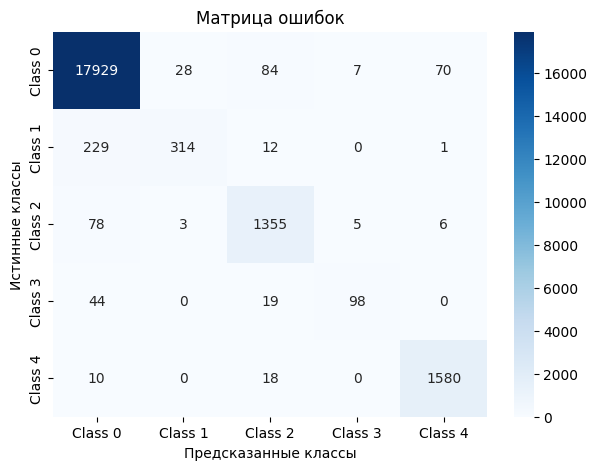

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize

cm = confusion_matrix(y_test, y_pred)
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"]
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Предсказанные классы")
plt.ylabel("Истинные классы")
plt.title("Матрица ошибок")
plt.show()

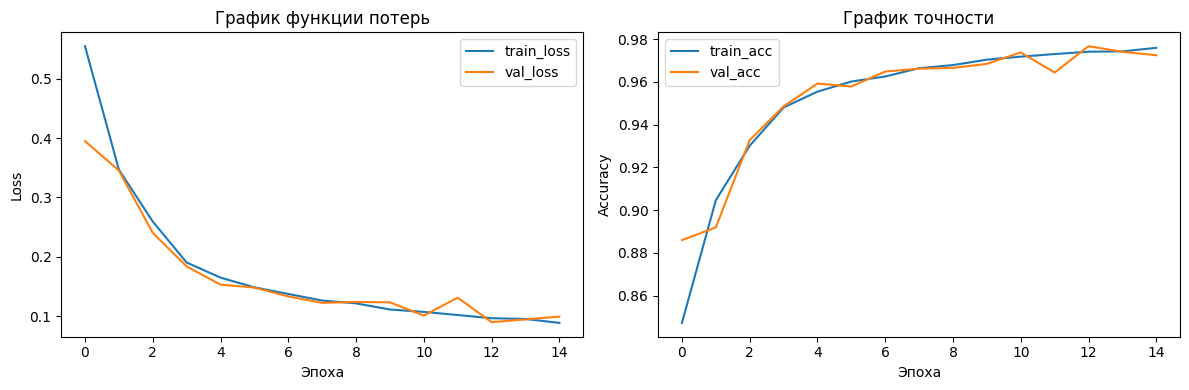

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('График функции потерь')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('График точности')
plt.xlabel('Эпоха')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

# ROC-AUC для каждого класса
for class_id in range(5):
    auc = roc_auc_score((y_test == class_id).astype(int), y_pred[:, class_id])
    print(f"Class {class_id}: AUC = {auc:.3f}")


685/685 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     18118
           1       0.91      0.56      0.70       556
           2       0.91      0.94      0.92      1447
           3       0.89      0.61      0.72       161
           4       0.95      0.98      0.97      1608

    accuracy                           0.97     21890
   macro avg       0.93      0.82      0.86     21890
weighted avg       0.97      0.97      0.97     21890

Class 0: AUC = 0.988
Class 1: AUC = 0.958
Class 2: AUC = 0.996
Class 3: AUC = 0.987
Class 4: AUC = 0.999


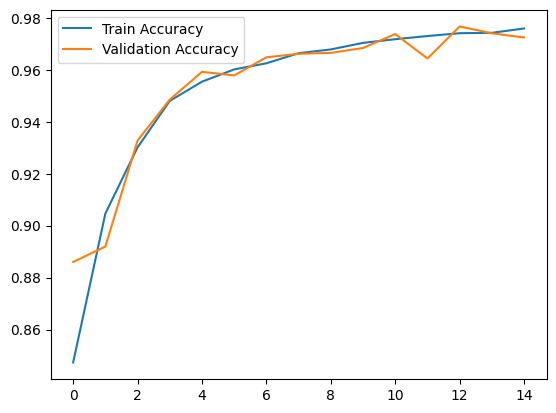

In [25]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


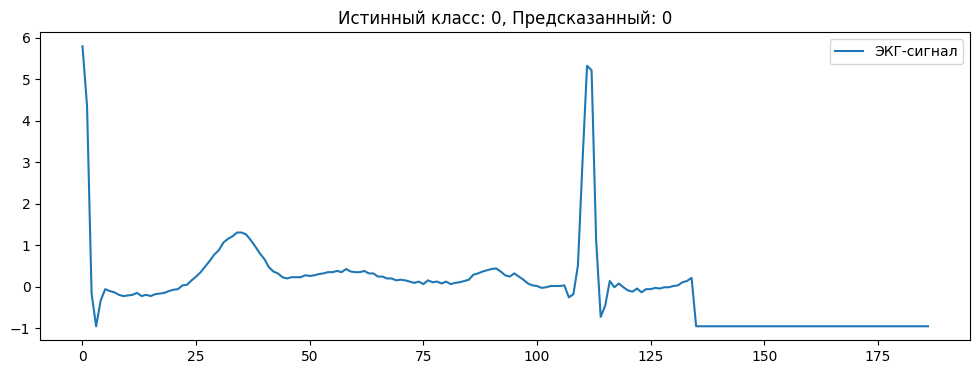

In [26]:
plt.figure(figsize=(12, 4))
plt.plot(X_test[0], label='ЭКГ-сигнал')
plt.title(f"Истинный класс: {y_test[0]}, Предсказанный: {y_pred_classes[0]}")
plt.legend()
plt.show()


**Улучшение модели**

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# -----------------------------------------------------------------------------
# 1. Определение упрощенного Attention-слоя
# -----------------------------------------------------------------------------
class AttentionLayer(layers.Layer):
    """
    Простейший вариант механизма внимания, вычисляющий веса важности
    для каждого временного шага и формирующий контекстный вектор.
    """
    def __init__(self):
        super(AttentionLayer, self).__init__()
        # При желании здесь можно добавить обучаемые Dense-слои
        # для более гибкого вычисления весов

    def call(self, inputs):
        """
        :param inputs: тензор размерности [batch_size, timesteps, hidden_dim]
        :return: тензор размерности [batch_size, hidden_dim] — контекстный вектор
        """
        # Вычислим "оценку" важности каждого шага; 
        # здесь для упрощения применим суммирование по признакам 
        # и softmax по временной оси:
        score = tf.reduce_sum(inputs, axis=-1, keepdims=True)  # [batch_size, timesteps, 1]
        attention_weights = tf.nn.softmax(score, axis=1)       # [batch_size, timesteps, 1]

        # Умножаем входные данные на веса внимания
        weighted_inputs = inputs * attention_weights           # [batch_size, timesteps, hidden_dim]

        # Суммируем взвешенные представления по временной оси
        context_vector = tf.reduce_sum(weighted_inputs, axis=1)  # [batch_size, hidden_dim]

        return context_vector

# -----------------------------------------------------------------------------
# 2. Пример архитектуры CNN + LSTM + Attention
# -----------------------------------------------------------------------------
def build_cnn_lstm_attention_model(input_shape=(187, 1), num_classes=5):
    """
    :param input_shape: (timesteps, channels)
    :param num_classes: количество целевых классов
    :return: готовая к обучению модель CNN + LSTM + Attention
    """

    model = models.Sequential()
    
    # Блок 1D-CNN
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    
    # LSTM-блок (return_sequences=True, чтобы Attention получал последовательность)
    model.add(layers.LSTM(64, return_sequences=True))
    
    # Добавление пользовательского Attention-слоя
    model.add(AttentionLayer())
    
    # Полносвязный блок
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model

# -----------------------------------------------------------------------------
# 3. Обучение и оценка модели
# -----------------------------------------------------------------------------

# Пример: X_train, y_train, X_test, y_test уже подготовлены (масштабированы, reshaped)
# X_train.shape -> (num_samples, 187, 1), y_train.shape -> (num_samples,)
# Предположим, что num_classes=5 (классы 0..4)

model_attention = build_cnn_lstm_attention_model(input_shape=(187, 1), num_classes=5)
model_attention.summary()

# Обучение
history_attention = model_attention.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

# Оценка
test_loss, test_acc = model_attention.evaluate(X_test, y_test, verbose=0)
print(f"Точность модели с Attention: {test_acc:.4f}")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)                    │ (None, 185, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 183, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 91, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 91, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_layer (AttentionLayer)     │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,845 (171.27 KB)

 Trainable params: 43,845 (171.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 70s 124ms/step - accuracy: 0.8565 - loss: 0.5516 - val_accuracy: 0.9303 - val_loss: 0.2448
Epoch 2/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 67s 123ms/step - accuracy: 0.9402 - loss: 0.2280 - val_accuracy: 0.9583 - val_loss: 0.1593
Epoch 3/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 67s 123ms/step - accuracy: 0.9595 - loss: 0.1605 - val_accuracy: 0.9657 - val_loss: 0.1332
Epoch 4/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 68s 124ms/step - accuracy: 0.9668 - loss: 0.1336 - val_accuracy: 0.9704 - val_loss: 0.1182
Epoch 5/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 67s 123ms/step - accuracy: 0.9703 - loss: 0.1164 - val_accuracy: 0.9714 - val_loss: 0.1131
Epoch 6/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 67s 123ms/step - accuracy: 0.9730 - loss: 0.1116 - val_accuracy: 0.9568 - val_loss: 0.1526
Epoch 7/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 67s 123ms/step - accuracy: 0.9720 - loss: 0.1076 - val_accuracy: 0.9705 - val_loss: 0.1106
Epoch 8/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 67s 123ms/step - accuracy: 0.9749 - loss: 0

In [29]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_attention = model_attention.predict(X_test)
y_pred_classes_attention = np.argmax(y_pred_attention, axis=1)

print(classification_report(y_test, y_pred_classes_attention))

# ROC-AUC для каждого класса
for class_id in range(5):
    auc = roc_auc_score((y_test == class_id).astype(int), y_pred_attention[:, class_id])
    print(f"Class {class_id}: AUC = {auc:.3f}")

685/685 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18118
           1       0.95      0.61      0.74       556
           2       0.94      0.93      0.94      1447
           3       0.92      0.67      0.77       161
           4       0.99      0.97      0.98      1608

    accuracy                           0.98     21890
   macro avg       0.96      0.84      0.88     21890
weighted avg       0.98      0.98      0.98     21890

Class 0: AUC = 0.991
Class 1: AUC = 0.964
Class 2: AUC = 0.996
Class 3: AUC = 0.990
Class 4: AUC = 0.999
